In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [377]:
# I = np.load("/home/vasily/Downloads/DCIM/MobIR/SourceVideo/big/VID_20250214_215429.mp4.i_t_phi.npy")
I = np.load("/home/vasily/Downloads/DCIM/MobIR/SourceVideo/big/VID_20250214_214323.mp4.i_t_phi.npy")

In [378]:
t = np.arange(I.shape[0]).astype(np.float32)/25

In [379]:
T_min = 18
T_max = 37

In [380]:
I = I*(T_max-T_min)+T_min

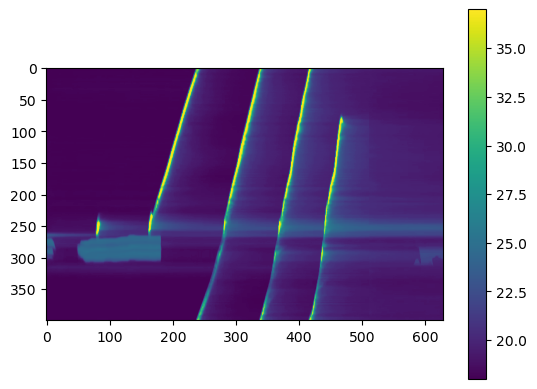

In [381]:
plt.imshow(I.T)
plt.colorbar()

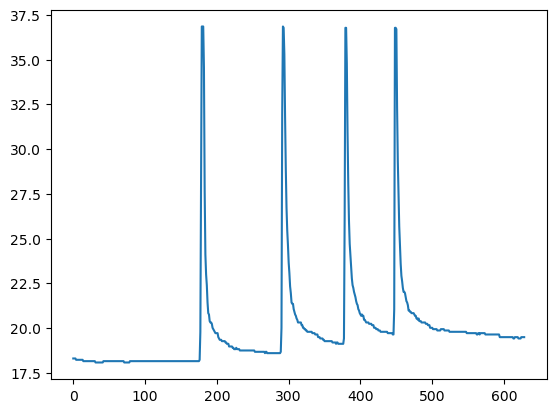

In [401]:
plt.plot(I.T[200])

/tmp/ipykernel_211446/759287425.py:1: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(I[3400:3700].T)


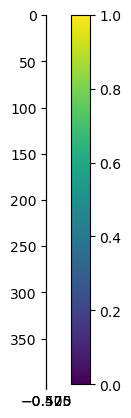

In [382]:
plt.imshow(I[3400:3700].T)
plt.colorbar()

In [383]:
from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line as draw_line
from skimage import data
from skimage.filters import prewitt_h, prewitt_v

# import matplotlib.pyplot as plt
from matplotlib import cm

In [387]:
# image = I[3400:3700].T
image = I.T[:, 150:]
t = np.arange(image.shape[1]).astype(np.float32)/25

In [388]:
import cv2

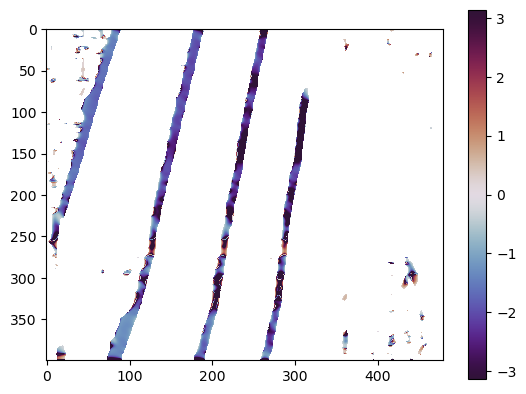

In [389]:
# angle = np.angle(prewitt_v(image) + prewitt_h(image)*1j)
v = prewitt_v(image)
h = prewitt_h(image)


v = cv2.Sobel(image, cv2.CV_32F, 1, 0, ksize=31)

# Gradient-Y
# grad_y = cv.Scharr(gray,ddepth,0,1)
h = cv2.Sobel(image,  cv2.CV_32F, 0, 1, ksize=31)

mag = np.sqrt(np.power(v, 2), np.power(h, 2))
angle_pupu = -np.arctan2(h, v) 
# angle = np.arctan2(v, h) -np.pi/2

angle = -np.arctan2(v, h) 
angle[mag < 0.1] = np.nan
angle[np.abs(angle_pupu) > 1.2] = np.nan
vel = np.clip(np.tan(angle)*25*np.pi*0.4 * (2*np.pi/angle.shape[0]), -4, 4)
plt.imshow(vel, cmap="twilight_shifted",vmin=-np.pi, vmax=np.pi)
# plt.imshow(np.tan(angle)*25*np.pi*0.4 * (2*np.pi/angle.shape[0]), cmap="twilight_shifted",vmin=-0.3, vmax=0.3)
plt.colorbar()

In [390]:
# plt.plot(np.nanmean(vel[250:300], axis=0), 'o')

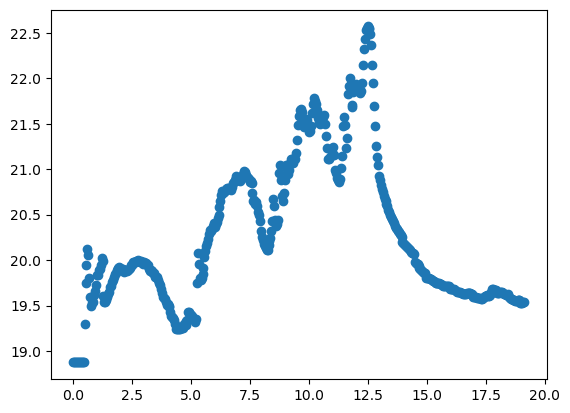

In [391]:
plt.scatter(t, np.nanmean(image.T, axis=1))

In [392]:
# plt.imshow(image.T[:, np.argmax(image.T, axis=1)])

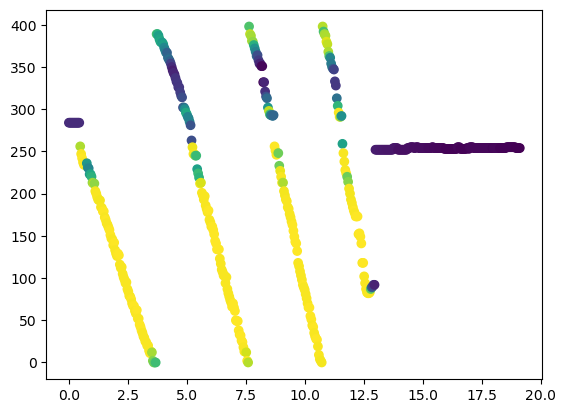

In [393]:
plt.scatter(t, np.argmax(image.T, axis=1), c=np.max(image.T, axis=1))

/tmp/ipykernel_211446/1210198648.py:1: RuntimeWarning: Mean of empty slice
  plt.scatter(t, np.abs(np.nanmean(vel, axis=0)), c=np.argmax(image.T, axis=1))


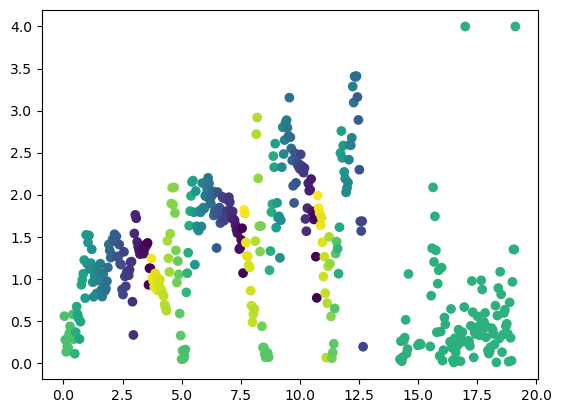

In [394]:
plt.scatter(t, np.abs(np.nanmean(vel, axis=0)), c=np.argmax(image.T, axis=1))

/tmp/ipykernel_211446/3101783763.py:1: RuntimeWarning: Mean of empty slice
  plt.scatter(np.argmax(image.T, axis=1), np.abs(np.nanmean(vel, axis=0)), c=t)


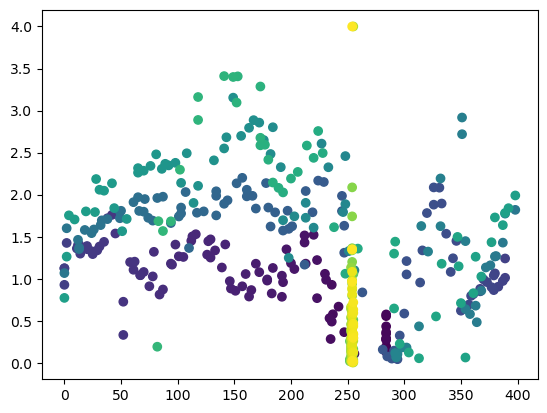

In [395]:
plt.scatter(np.argmax(image.T, axis=1), np.abs(np.nanmean(vel, axis=0)), c=t)

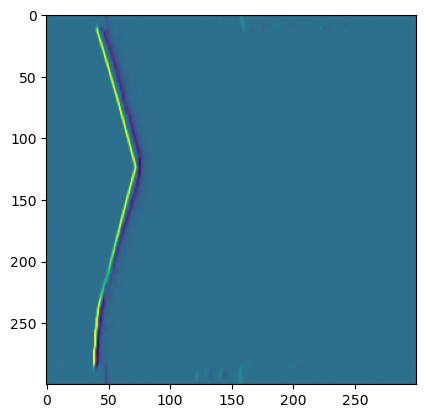

In [45]:
plt.imshow(prewitt_v(image))

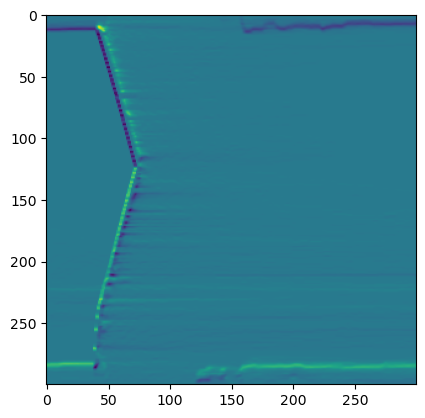

In [43]:
plt.imshow(prewitt_h(image))

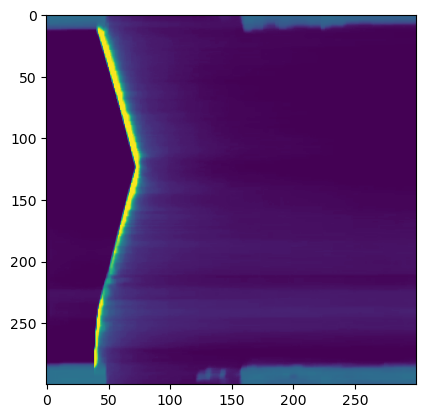

In [22]:
plt.imshow(image)

In [400]:
# tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 400, endpoint=False)
# h, theta, d = hough_line(image, theta=tested_angles)

In [399]:

# # Generating figure 1
# fig, axes = plt.subplots(1, 3, figsize=(15, 6))
# ax = axes.ravel()

# ax[0].imshow(image, cmap=cm.gray)
# ax[0].set_title('Input image')
# ax[0].set_axis_off()

# angle_step = 0.5 * np.diff(theta).mean()
# d_step = 0.5 * np.diff(d).mean()
# bounds = [
#     np.rad2deg(theta[0] - angle_step),
#     np.rad2deg(theta[-1] + angle_step),
#     d[-1] + d_step,
#     d[0] - d_step,
# ]
# ax[1].imshow(h, extent=bounds, cmap=cm.gray, aspect=1 / 1.5)
# ax[1].set_title('Hough transform')
# ax[1].set_xlabel('Angles (degrees)')
# ax[1].set_ylabel('Distance (pixels)')
# ax[1].axis('image')

# ax[2].imshow(image, cmap=cm.gray)
# ax[2].set_ylim((image.shape[0], 0))
# ax[2].set_axis_off()
# ax[2].set_title('Detected lines')

# for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
#     (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
#     ax[2].axline((x0, y0), slope=np.tan(angle + np.pi / 2))

# plt.tight_layout()
# plt.show()

In [121]:
def filter_by_range(t, I):
    mask = (I > (T_min+1)) & (I < (T_max-1))
    return t[mask], I[mask]

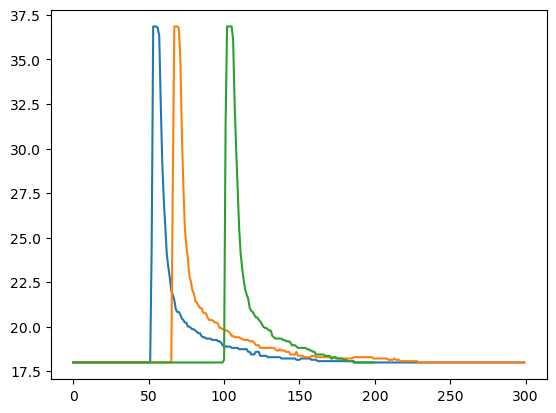

In [122]:
plt.plot(I[3400:3700, 50].T)
plt.plot(I[3400:3700, 100].T)
plt.plot(I[1200:1400, 50].T)



In [123]:
# (np.gradient(I[3400:3700, 50].T) < 0) & (I[3400:3700, 50].T > (T_max -1))

In [124]:
np.log(I[3400:3700, 60].T)

array([2.8903718, 2.8903718, 2.8903718, 2.8903718, 2.8903718, 2.8903718,
       2.8903718, 2.8903718, 2.8903718, 2.8903718, 2.8903718, 2.8903718,
       2.8903718, 2.8903718, 2.8903718, 2.8903718, 2.8903718, 2.8903718,
       2.8903718, 2.8903718, 2.8903718, 2.8903718, 2.8903718, 2.8903718,
       2.8903718, 2.8903718, 2.8903718, 2.8903718, 2.8903718, 2.8903718,
       2.8903718, 2.8903718, 2.8903718, 2.8903718, 2.8903718, 2.8903718,
       2.8903718, 2.8903718, 2.8903718, 2.8903718, 2.8903718, 2.8903718,
       2.8903718, 2.8903718, 2.8903718, 2.8903718, 2.8903718, 2.8903718,
       2.8903718, 2.8903718, 2.8903718, 2.8903718, 2.8903718, 2.8903718,
       2.8903718, 3.3605115, 3.6068823, 3.6068823, 3.6068823, 3.6068823,
       3.5592618, 3.430439 , 3.3396   , 3.2627614, 3.204021 , 3.1764185,
       3.1319072, 3.1155176, 3.085322 , 3.0716035, 3.064673 , 3.0435884,
       3.0400305, 3.029281 , 3.0184143, 3.0147657, 3.0147657, 3.0147657,
       3.0147657, 3.0037394, 2.9963202, 2.9925902, 

In [132]:
from scipy import stats


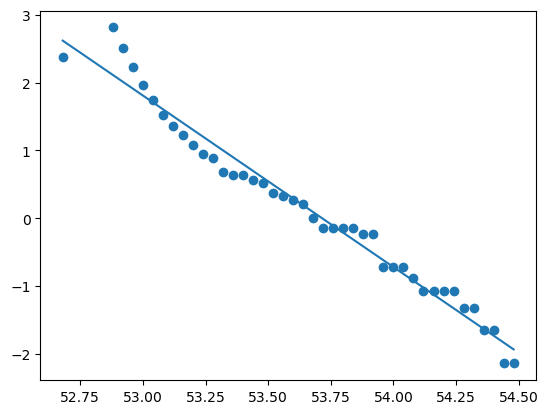

In [163]:
# for i in range(10, 200, 30):
t_, I_ = filter_by_range(t[1200:1400], I[1200:1400, 100].T)
plt.scatter(t_, np.log(I_-19))

slope, intercept, r_value, p_value, std_err = stats.linregress(t_,np.log(I_-19))

plt.plot(t_, intercept + slope*t_)

In [164]:
-1/slope

np.float64(0.3954675172546695)

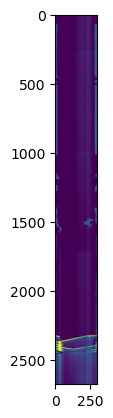

In [9]:
plt.imshow(I)